# Step-1 : Business Problem Understanding
    

* Identify relationship between total advertising spend and sales?

* Our next campaigon will have a total spend of dollar200,00 how many units 
  do we expect to sell as a result of this?

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step-2 : Data Understanding

# 2.1 : Data Collection

In [13]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


* If Someone was to spend a toatal of dollar 200,000, what would the expected sales be?

* We have simplified this quite a bit by  combining all the feature into total spend.

In [15]:
df['total_spend']=df["TV"]+df["radio"]+df["newspaper"]

In [16]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [17]:
df.drop(columns=["TV","radio","newspaper"],inplace=True)

In [18]:
df

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000
...,...,...
195,7600,55700
196,9700,107200
197,12800,192700
198,25500,391800


# Data Processing

# 3.1 : Exploratory Data Analysis (EDA)

On the basic of data, how should you spend Advertising money in the future? general question might lead you to more specific questions:
    
    1. Is there a relationship between add and sales?
    
    2. How strong is that relationship?
    
    3. Given ad spending, can sales be predicted?

In [19]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


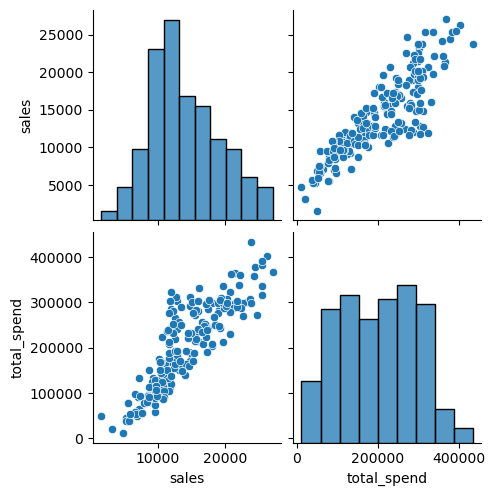

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


# Step -3.2 : Data cleaning

In [22]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

# step 3.3 : Data Wrangling

In [23]:
#no encoding reqired

# step - 3.4 :Train test split

In [25]:
#create s and y
# taking only one variable for now

x=df.drop(columns='sales')
y=df['sales']

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# step -4 : Modelling

Modelling with default parameters.

y^=Bo+B1*X

In [56]:
#impoort

from sklearn.linear_model import LinearRegression


In [57]:
#save the model
model=LinearRegression()

In [58]:
#fit

model.fit(x_train,y_train)

LinearRegression()

In [59]:
#print Intercept

model.intercept_

4169.512013489044

In [60]:
#print coeff
model.coef_

array([0.0489571])

# prediction

In [61]:
train_prediction=model.predict(x_train)

In [62]:
test_prediction=model.predict(x_test)

# Step 5 : Evaluation

In [63]:
from sklearn.metrics import mean_absolute_error

print("MAE for test Data:",mean_absolute_error(y_test,test_prediction))
print("MAE for  train data:", mean_absolute_error(y_train,train_prediction))


MAE for test Data: 2088.4273558466143
MAE for  train data: 1917.5145382145042


In [64]:
from sklearn.metrics import mean_squared_error

print("MSE for test data:", mean_squared_error(y_test,test_prediction))
      
print("MSE for train data", mean_squared_error(y_train,train_prediction))

MSE for test data: 7779806.406885764
MSE for train data 6421575.106597045


In [65]:
print("RMSE for test Data",np.sqrt(mean_squared_error(y_test,test_prediction)))
      
print("RMSE for train data",np.sqrt(mean_squared_error(y_train,train_prediction)))      

RMSE for test Data 2789.230432733331
RMSE for train data 2534.0826952956854


In [66]:
from sklearn.metrics import r2_score
print("R2 for test data",r2_score(y_test,test_prediction))

print("R2 for train data",r2_score(y_train,train_prediction))

R2 for test data 0.7535196255373878
R2 for train data 0.7524092686260718


In [67]:
#Or 
model.score(x_train,y_train)

0.7524092686260718

In [68]:
model.score(x_test,y_test)

0.7535196255373878

# Checklist

# For any Supervised Machine Learning Algorithm(Other than Regression)



* 1. Check wheather model has overfiting problem.

* 2. Is test accuracy = Cross validation Score

* 3. Check model meets the business problem requirements.

* 4. Finally, save the model and share to the deployment team.



* For linear Regression in addition we have to

* 3. check Assumptions (if it is linear regression)

# 1. Is model has underfiting or overfiting problem?

  Answer: no, it is good model.

# 2.Is test accuracy = Cross validation score

In [69]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(model,x,y,cv=5)

cv_score=score.mean()

print("Cross Validation Score",cv_score)

Cross Validation Score 0.743378317855542


# Check for Assumption

In [71]:
test_res = y_test - test_prediction

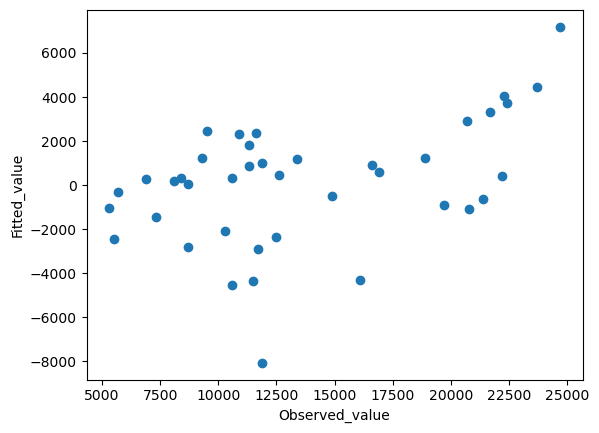

In [72]:
plt.scatter(y_test,test_res)
plt.xlabel("Observed_value")
plt.ylabel("Fitted_value")
plt.show()

# 2. Normality of errors

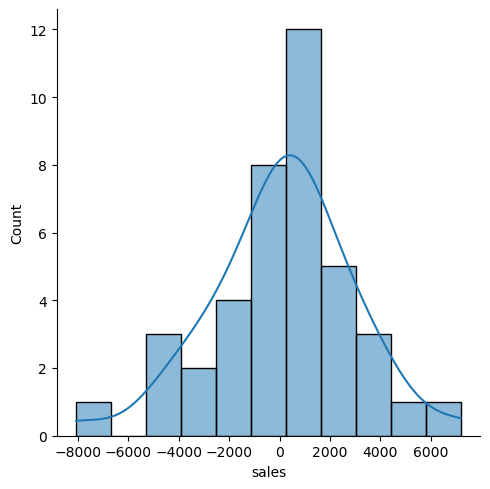

In [73]:
sns.displot(test_res,kde=True)

#plt.hist(test_res)

plt.show()

# 3. Equal Variance of Errors (Homoscsde)

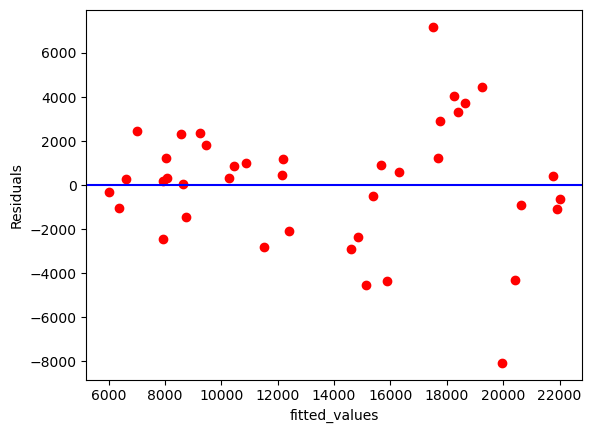

In [75]:
plt.scatter(test_prediction,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('fitted_values')
plt.ylabel('Residuals')
plt.show()

In [77]:
import statsmodels.formula.api as smf

model2=smf.ols("y~x",data=df).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           5.06e-62
Time:                        17:34:57   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# step -6 : Final Interences

Our next ad campaign will have a total spend of 200k on ads, how many units could we expect to sell as a result of this.?

In [79]:
#Use the model to make predictions on a new value

model.predict([[321400]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19904.32272443])

# Save a Model

In [80]:
from joblib import dump

In [81]:
dump(model,'sales_model.joblib')

['sales_model.joblib']

# Load a Model


In [83]:
from joblib import load

In [87]:
loaded_model=load('sales_model.joblib')

In [88]:
loaded_model.predict([[200000]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13960.93124868])